# Simple Moving Average and Exponential Moving Average Comparison Demo

In this notebook, we will demonstrate how the simple and exponential moving average differ. We will plot exponential moving average (EMA) and simple moving average (SMA) lines of different periods, and see how they track a signal value differently.

[Moving Averages on Wikipedia](https://en.wikipedia.org/wiki/Moving_average)

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Import functions from a separate file: SmaEmaHelperFunctions.py
from SmaEmaHelperFunctions import * 


## Plotting Function

In [2]:
# Plots 3 lines: raw data, EMA(period_1), EMA(period_2)
def calculateAndPlotSMAandEMA(data, ema_period_1, sma_period_1):
    ema_1 = getEMAdataset(data, ema_period_1)
    sma_1 = getSMAlist(data, sma_period_1)
    x = np.arange(len(data))
    plt.plot(x, data)
    plt.plot(x, ema_1)
    plt.plot(x, sma_1)
    ema_legend_text_1 = "EMA(" + str(ema_period_1) + ")"
    sma_legend_text_1 = "SMA(" + str(sma_period_1) + ")"
    plt.legend(['Value', ema_legend_text_1, sma_legend_text_1])
    plt.title("Exponential Moving Averages")
    plt.show()

## Result Plots

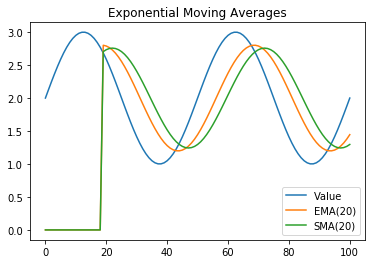

In [3]:
# Sine Wave Inputs
period = 50.0
amplitude = 2.0
sigma = 2.0
start = 0.0
end = 100.0
sineData = generateSineWave(period, amplitude, sigma, end)
calculateAndPlotSMAandEMA(sineData, 20, 20)

In the figure above, we use the same period (20) for both the SMA and EMA. We can see that the EMA tracks the Value signal with less lag than the SMA. This is because the EMA assigns more weight to the most recent values.

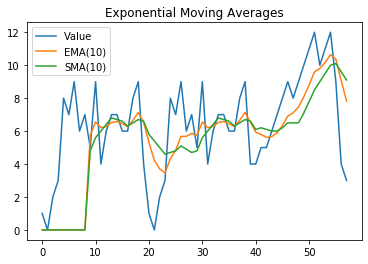

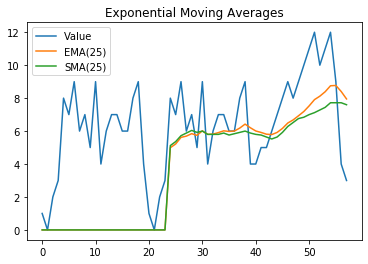

In [4]:
# Using some fictional data.
finalData = [1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4, 
           1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4,
           4, 5, 5, 6, 7, 8, 9, 8, 9, 10, 11, 12, 10, 11, 12, 9, 4, 3]

calculateAndPlotSMAandEMA(finalData, 10, 10)
calculateAndPlotSMAandEMA(finalData, 25, 25)

In the above plots we can see how SMA and EMA for the same period differ. EMA tracks the signal value closer.

## Function Testing Suite

In [5]:
import unittest

class TestNotebook(unittest.TestCase):
    
    # SMA Functions Testing (More extensive testing can be found in the SMA Notebook.)
           
    def test_getSMAlist(self):
        someData = [1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0]
        self.assertEqual(getSMAlist(someData, 1), someData)
        self.assertEqual(getSMAlist(someData, 3),[0.0, 0.0, 1.0, 1.0, 1.0, 2/3, 1/3])
        self.assertEqual(getSMAlist(someData, 5),[0.0, 0.0, 0.0, 0.0, 0.8, 0.8, 0.8])
        
    def test_sineWave(self):
        sineWaveArray = generateSineWave(8, 2.0, 0.0, 8)
        self.assertAlmostEqual(sineWaveArray[2], 1.0)
        self.assertAlmostEqual(sineWaveArray[4], 0.0)
        self.assertAlmostEqual(sineWaveArray[6], -1.0)
        self.assertAlmostEqual(sineWaveArray[8], 0.0)

    # EMA Functions Testing (More extensive testing can be found in the EMA Notebook.)
    
    def test_calculateAlpha_equal(self):
        # This test has a precise answer so it can use assertEqual
        self.assertEqual(calculateAlpha(9), 0.2)
        self.assertEqual(calculateAlpha(3), 0.5)
              
    def test_getDenominator(self):
        self.assertEqual(getDenominator(3), 1.75)
        
    def test_getNumerator(self):
        shortData = [1, 0, 2, 3, 8]
        self.assertEqual(getNumerator(shortData, 2, 3), 2.25)
        
    def test_getEMA(self):
        data100 = np.ones(100) * 10.0
        self.assertEqual(getEMA(data100, 1, 2), 10.0)
    
# Run the tests.
unittest.main(argv=[''], verbosity=1, exit=False)   

......
----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK
